This notebook investigates the binary cross-entropy loss. It follows from applying the formula in section 5.2 to a loss function based on the Bernoulli distribution.

In [17]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Import math Library
import math

In [18]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    model_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return model_out
     

In [19]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.6;
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0

  return beta_0, omega_0, beta_1, omega_1

In [20]:
# Utility function for plotting data
def plot_binary_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Make sure model data are 1D arrays
  x_model = np.squeeze(x_model)
  out_model = np.squeeze(out_model)
  lambda_model = np.squeeze(lambda_model)

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model)
  ax[0].set_xlabel(r'Input, '); ax[0].set_ylabel(r'Model output')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model)
  ax[1].set_xlabel(r'Input, '); ax[1].set_ylabel(r'or Pr(y=1|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.05,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    ax[1].plot(x_data, y_data, 'ko')
  plt.show()

# Binary Classification

In binary classification tasks, the network predicts the probability of the output belonging to class 1. Since probabilities must lie in [0,1] and the network can output arbitrary values, we map the network through a sigmoid function that ensures the range is valid.

In [21]:
# Sigmoid function that maps [-infty,infty] to [0,1]
def sigmoid(model_out):
  # TODO -- implement the logistic sigmoid function from equation 5.18
  # Replace this line:
  sig_model_out = 1/(1+np.exp(-model_out))

  return sig_model_out

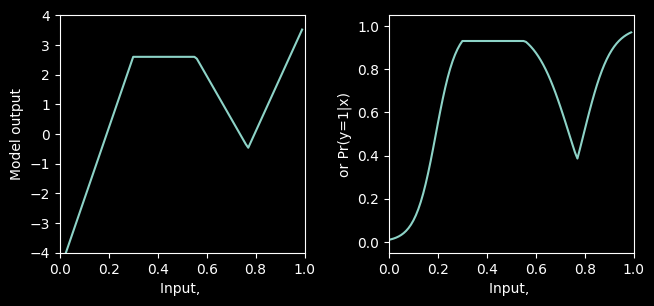

In [22]:
# Let's create some 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([0,1,1,0,0,1,\
                    1,0,0,1,0,1,\
                    0,1,1,0,1,0, \
                    1,1])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)

The left is model output and the right is the model output after the sigmoid has been applied, so it now lies in the range [0,1] and represents the probability, that y=1. The black dots show the training data. We'll compute the likelihood and the negative log likelihood.

In [23]:
# Return probability under Bernoulli distribution for observed class y
def bernoulli_distribution(y, lambda_param):
    # TODO-- write in the equation for the Bernoulli distribution
    # Equation 5.17 from the notes (you will need np.power)
    # Replace the line below
    prob = np.power(1-lambda_param, 1-y)*np.power(lambda_param, y)

    return prob

In [24]:
# Let's double check we get the right answer before proceeding
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.8,bernoulli_distribution(0,0.2)))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,bernoulli_distribution(1,0.2)))

Correct answer = 0.800, Your answer = 0.800
Correct answer = 0.200, Your answer = 0.200


In [ ]:
# Return the likelihood of all of the data under the model
def compute_likelihood(y_train, lambda_param):
  # TODO -- compute the likelihood of the data -- the product of the Bernoulli probabilities for each data point
  # Top line of equation 5.3 in the notes
  # You will need np.prod() and the bernoulli_distribution function you used above
  # Replace the line below
  likelihood = 0

  return likelihood

In [ ]:
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the Bernoulli parameter lambda
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
# Compute the likelihood
likelihood = compute_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000070237,likelihood))

You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well. This is because it is the product of several probabilities, which are all quite small themselves. This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math

This is why we use negative log likelihood